## 프레임 별 감정 분석

- Author
  - cheesecat47 <cheeseecat47@gmail.com>
- References
  - https://github.com/Moddy2024/ResNet-9/blob/main/prediction.ipynb


In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import torch
from ai import detect_faces, extract_frames, get_default_device, predict, to_device
from resnet9 import ResNet9
from tqdm import tqdm

In [2]:
BASE_PATH = "/home/ssafy/d102-fer"
VIDEO_PATH = os.path.join(BASE_PATH, "test1.mp4")

In [3]:
frame_list = extract_frames(VIDEO_PATH)

Extract 9 images


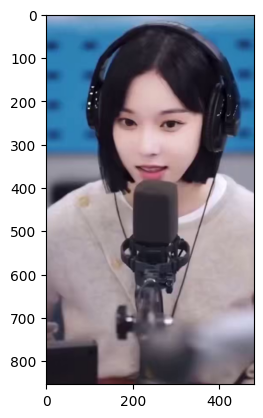

In [4]:
plt.imshow(frame_list[0])

### 검출기 로딩

- haar cascade


In [5]:
haar_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
haar_cascade

< cv2.CascadeClassifier 0x7f197f973d70>

100%|██████████| 9/9 [00:00<00:00, 194.07it/s]


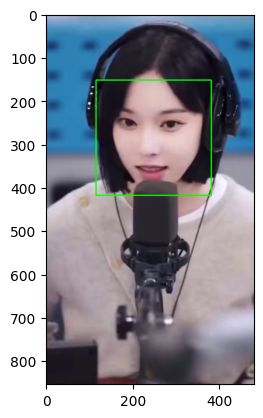

In [6]:
img_list = []
face_img_list = []

for img in tqdm(frame_list, total=len(frame_list)):
    img_box, face_img = detect_faces(img, (48, 48), haar_cascade)
    img_list.append(img_box)
    face_img_list.append(face_img)

plt.imshow(img_list[0])

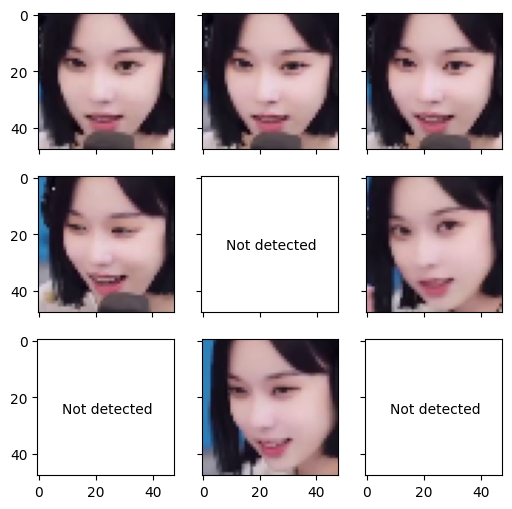

In [7]:
c = 3
r = len(face_img_list) // c

fig, axes = plt.subplots(r, c, figsize=(
    r * 2, c * 2), sharex=True, sharey=True)

i = -1
for img in face_img_list:
    i += 1
    if img is None:
        axes[i // c, i % c].text(24, 24, "Not detected",
                                 ha="center", va="center")
        continue

    axes[i // c, i % c].imshow(img)

plt.show()
plt.close(fig)

## 감정 분류

- https://github.com/Moddy2024/ResNet-9/blob/main/prediction.ipynb


In [8]:
device = get_default_device()
device

device(type='cuda')

### 모델

- ResNet9


In [9]:
MODEL_NAME = "ResNet9"

MODELS = {
    "ResNet9": "./models/ResNet9/ResNet9_epoch-198_score-0.846.pth",
}

In [10]:
MODEL_PATH = MODELS[MODEL_NAME]
print(MODEL_PATH)

model = to_device(ResNet9(1, 7), device)
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()
model

./models/ResNet9/ResNet9_epoch-198_score-0.846.pth


Sequential(
  (0): Sequential(
    (0): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Sequential(
      (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.

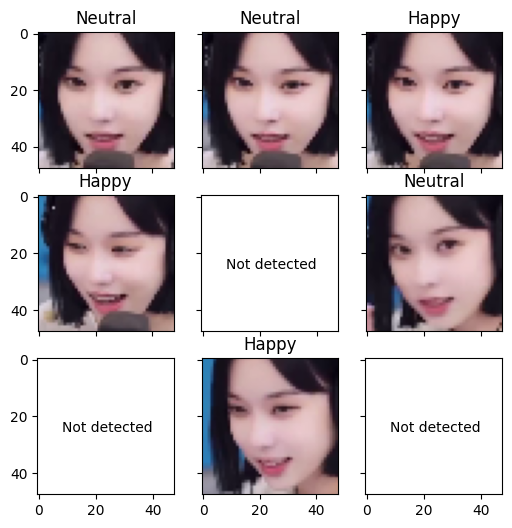

In [11]:
from PIL import Image

c = 3
r = len(face_img_list) // c

fig, axes = plt.subplots(r, c, figsize=(r * 2, c * 2), sharex=True, sharey=True)

i = -1
for img in face_img_list:
    i += 1
    if img is None:
        axes[i // c, i % c].text(24, 24, "Not detected", ha="center", va="center")
        continue
    axes[i // c, i % c].imshow(img)
    axes[i // c, i % c].set_title(predict(Image.fromarray(img), model, device))

plt.show()
plt.close(fig)